In [78]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go

#pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)

In [2]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
from projectfun import *


## Data
- All Data was scraped from Basketball-Reference.com
- Majority of data from advanced player stats for each season
- Combined with points from player per game stats

In [4]:
#training data (contains seaons 13/14 - 19/20)
df = pd.read_csv('stats_1320.csv')
#testing data (contains seasons 20/21 and 21/22)
testdf = pd.read_csv("stats_2022.csv")
testdf2 = pd.read_csv("stats_2022.csv")
#names of players who made All-NBA team for seasons 13/14 - 21/22
all_nba = pd.read_csv("all_nba.csv")

In [5]:
#gets rid of star so player names are corrected
df['Player'] = df['Player'].str.replace(r'\*', '')
testdf['Player'] = testdf['Player'].str.replace(r'\*', '')
testdf2['Player'] = testdf2['Player'].str.replace(r'\*', '')

/var/folders/m1/6jr0fxrx2v3dy832gwp52yc00000gn/T/ipykernel_62378/2278848695.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Player'] = df['Player'].str.replace(r'\*', '')
/var/folders/m1/6jr0fxrx2v3dy832gwp52yc00000gn/T/ipykernel_62378/2278848695.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  testdf['Player'] = testdf['Player'].str.replace(r'\*', '')
/var/folders/m1/6jr0fxrx2v3dy832gwp52yc00000gn/T/ipykernel_62378/2278848695.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  testdf2['Player'] = testdf2['Player'].str.replace(r'\*', '')


### Keeping Correct Columns and Cutting Down Training Data

In [6]:
#keeps only metrics we want
df['All-Nba'] = 0
df = df[['Player', "Pos",'G', 'PER', 'TS%', 'TRB%', 'AST%', 'USG%', 'WS/48', 'BPM', 'VORP', 'PPG', 'season', 'All-Nba']]

#played more than 50 games
df = df[df["G"] >= 40]



In [7]:
testdf['All-Nba'] = 0
testdf = testdf[['Player', "Pos",'G', 'PER', 'TS%', 'TRB%', 'AST%', 'USG%', 'WS/48', 'BPM', 'VORP', 'PPG', 'season', 'All-Nba']]

#played more than 50 games
testdf = testdf[testdf["G"] >= 40]


In [8]:
testdf2['All-Nba'] = 0
testdf2 = testdf2[['Player', "Pos",'G', 'PER', 'TS%', 'TRB%', 'AST%', 'USG%', 'WS/48', 'BPM', 'VORP', 'PPG', 'season', 'All-Nba']]

#played more than 50 games

### Encode All-NBA status into binary

In [79]:
#training seasons
encode_all_nba(df,all_nba["2013-14"], 1314)
encode_all_nba(df,all_nba["2014-15"], 1415)
encode_all_nba(df,all_nba["2015-16"], 1516)
encode_all_nba(df,all_nba["2016-17"], 1617)
encode_all_nba(df,all_nba["2017-18"], 1718)
encode_all_nba(df,all_nba["2018-19"], 1819)
encode_all_nba(df,all_nba["2019-20"], 1920)

,Player,Pos,G,PER,TS%,TRB%,AST%,USG%,WS/48,BPM,VORP,PPG,season,All-Nba
0,Quincy Acy,SF,63,10.1,0.520,14.4,4.9,10.1,0.086,-1.7,0.1,2.7,1314,0
2,Quincy Acy,SF,56,9.6,0.518,14.4,4.4,9.8,0.078,-2.2,0.0,2.7,1314,0
3,Steven Adams,C,81,11.2,0.541,15.6,4.9,11.7,0.114,-2.2,-0.1,3.3,1314,0
4,Jeff Adrien,PF,53,17.4,0.553,18.2,6.8,17.3,0.134,-0.9,0.3,10.9,1314,0
7,Arron Afflalo,SG,73,16.0,0.574,5.8,16.9,23.3,0.099,-0.2,1.1,18.2,1314,0
8,Alexis Ajinça,C,56,14.6,0.589,16.9,6.6,16.3,0.104,-2.6,-0.1,5.9,1314,0
9,Cole Aldrich,C,46,19.1,0.620,23.0,6.4,13.0,0.178,1.5,0.3,2.0,1314,0
10,LaMarcus Aldridge,PF,69,21.8,0.507,16.5,13.0,29.8,0.144,2.3,2.7,23.2,1314,1
11,Lavoy Allen,PF,65,12.5,0.470,15.7,10.1,14.6,0.066,-3.5,-0.4,2.9,1314,0
12,Lavoy Allen,PF,51,11.9,0.464,15.6,10.2,14.3,0.053,-3.8,-0.4,2.9,1314,0


In [80]:
#testing seasons
encode_all_nba(testdf,all_nba["2020-21"], 2021)
encode_all_nba(testdf,all_nba["2021-22"], 2122)

,Player,Pos,G,PER,TS%,TRB%,AST%,USG%,WS/48,BPM,VORP,PPG,season,All-Nba
0,Precious Achiuwa,PF,61,14.2,0.550,16.1,6.1,19.5,0.085,-4.1,-0.4,5.0,2021,0
2,Steven Adams,C,58,15.1,0.596,17.4,9.1,11.7,0.119,-0.3,0.7,7.6,2021,0
3,Bam Adebayo,C,64,22.7,0.626,15.3,26.9,23.7,0.197,4.9,3.7,18.7,2021,0
8,Nickeil Alexander-Walker,SG,46,12.5,0.522,7.8,14.7,23.2,0.035,-1.3,0.2,11.0,2021,0
9,Grayson Allen,SG,50,12.8,0.586,6.7,11.5,16.8,0.101,-0.2,0.6,10.6,2021,0
10,Jarrett Allen,C,63,20.1,0.661,18.9,8.7,16.6,0.166,1.1,1.4,13.2,2021,0
12,Jarrett Allen,C,51,19.8,0.649,18.3,8.8,16.8,0.155,0.8,1.1,13.2,2021,0
16,Kyle Anderson,PF,69,17.2,0.578,11.1,18.3,18.5,0.143,3.3,2.5,12.4,2021,0
17,Giannis Antetokounmpo,PF,61,29.2,0.633,17.5,28.7,32.5,0.244,9.0,5.6,28.1,2021,1
19,Thanasis Antetokounmpo,SF,57,10.3,0.523,11.8,10.3,15.3,0.057,-3.5,-0.2,2.9,2021,0


In [81]:
encode_all_nba(testdf2,all_nba["2020-21"], 2021)
encode_all_nba(testdf2,all_nba["2021-22"], 2122)

,Player,Pos,G,PER,TS%,TRB%,AST%,USG%,WS/48,BPM,VORP,PPG,season,All-Nba
0,Precious Achiuwa,PF,61,14.2,0.550,16.1,6.1,19.5,0.085,-4.1,-0.4,5.0,2021,0
1,Jaylen Adams,PG,7,-6.5,0.125,8.8,12.7,18.6,-0.252,-19.8,-0.1,0.3,2021,0
2,Steven Adams,C,58,15.1,0.596,17.4,9.1,11.7,0.119,-0.3,0.7,7.6,2021,0
3,Bam Adebayo,C,64,22.7,0.626,15.3,26.9,23.7,0.197,4.9,3.7,18.7,2021,0
4,LaMarcus Aldridge,C,26,15.7,0.556,9.4,11.0,22.2,0.080,-0.3,0.3,12.8,2021,0
5,LaMarcus Aldridge,C,21,15.1,0.545,9.2,10.2,22.7,0.067,-0.9,0.2,12.8,2021,0
6,LaMarcus Aldridge,C,5,18.2,0.611,10.2,14.3,19.9,0.135,2.2,0.1,12.8,2021,0
7,Ty-Shon Alexander,SG,15,4.2,0.349,12.1,15.4,15.0,-0.048,-6.5,-0.1,0.6,2021,0
8,Nickeil Alexander-Walker,SG,46,12.5,0.522,7.8,14.7,23.2,0.035,-1.3,0.2,11.0,2021,0
9,Grayson Allen,SG,50,12.8,0.586,6.7,11.5,16.8,0.101,-0.2,0.6,10.6,2021,0


### Check Encoding
- players printed are those with a binary coding of 1

In [12]:
check_all_nba(df)

Total all nba players:  105
                     Player  season
10        LaMarcus Aldridge    1314
149           Stephen Curry    1314
180            Goran Dragić    1314
185            Kevin Durant    1314
221             Paul George    1314
242           Blake Griffin    1314
252            James Harden    1314
283           Dwight Howard    1314
296            LeBron James    1314
302            Al Jefferson    1314
348          Damian Lillard    1314
353              Kevin Love    1314
422             Joakim Noah    1314
440             Tony Parker    1314
445              Chris Paul    1314
621       LaMarcus Aldridge    1415
736        DeMarcus Cousins    1415
746           Stephen Curry    1415
758           Anthony Davis    1415
784              Tim Duncan    1415
822              Marc Gasol    1415
823               Pau Gasol    1415
852           Blake Griffin    1415
863            James Harden    1415
897            Kyrie Irving    1415
903            LeBron James    1415


In [13]:
check_all_nba(testdf)

Total all nba players:  30
                     Player  season
17    Giannis Antetokounmpo    2021
45             Bradley Beal    2021
106            Jimmy Butler    2021
151           Stephen Curry    2021
171             Luka Dončić    2021
189             Joel Embiid    2021
223             Paul George    2021
229             Rudy Gobert    2021
317            Kyrie Irving    2021
329            LeBron James    2021
344            Nikola Jokić    2021
390           Kawhi Leonard    2021
396          Damian Lillard    2021
510              Chris Paul    2021
544           Julius Randle    2021
720   Giannis Antetokounmpo    2122
775            Devin Booker    2122
864           Stephen Curry    2122
872           DeMar DeRozan    2122
883             Luka Dončić    2122
903            Kevin Durant    2122
911             Joel Embiid    2122
1073           LeBron James    2122
1096           Nikola Jokić    2122
1231              Ja Morant    2122
1287             Chris Paul    2122
1

In [14]:
#drop na just incase of incomplete data that would mess of model
df = df.dropna()
testdf = testdf.dropna()


### Split training and testing data by position 
- (Guards, Forwards, and Centers)

In [15]:
df_guards,df_fronts,df_cents = pos_split(df)
testdf_guards, testdf_fronts,testdf_cents = pos_split(testdf)

### Split training and testing data into X and y and normalize 
 - testing data has Y to validate accuracy of our final predictions

In [16]:
X_trainG, y_trainG = normalize(df_guards)
X_testG, y_testG = normalize(testdf_guards)

X_trainF, y_trainF = normalize(df_fronts)
X_testF, y_testF = normalize(testdf_fronts)

X_trainC, y_trainC = normalize(df_cents)
X_testC, y_testC = normalize(testdf_cents)

# 

# 

# 

# The Model

In [17]:
def model(X_train,y_train,X_test,y_test):
    '''
    4 layer keras sequential model using a 20% validation split and val_loss to stop training
    '''
    class_weights = {0: 1, 1: 10}
    # Define the architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    # Use early stopping to prevent overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

    # Train the model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=16, 
                        callbacks=[early_stopping], class_weight=class_weights)
    
    # Evaluate the model
    #test_loss, test_acc = model.evaluate(X_test, y_test)
    #print('Test accuracy:', test_acc)
    y_pred = model.predict(X_test)
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    return model, y_pred,val_loss, val_acc

# Run Guard Model 
- returns model, predictions for guard testing data, validation loss over epochs

In [71]:
modelG, y_predG,val_lossG,val_accG = model(X_trainG,y_trainG,X_testG,y_testG)

Epoch 1/200
54/54 [==============================] - 1s 7ms/step - loss: 0.7842 - accuracy: 0.8600 - val_loss: 0.3725 - val_accuracy: 0.8498
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.8882 - val_loss: 0.2593 - val_accuracy: 0.8826
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.9118 - val_loss: 0.1746 - val_accuracy: 0.9155
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2878 - accuracy: 0.9259 - val_loss: 0.1476 - val_accuracy: 0.9249
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.9141 - val_loss: 0.1343 - val_accuracy: 0.9343
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.9200 - val_loss: 0.1256 - val_accuracy: 0.9390
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9400 - val_loss: 0.0913 - val_accuracy: 0.9765
Epoch 8/200
5

In [19]:
print("Final Validation Loss after Last Epoch: ", val_lossG[-1])
print("Final Validation Accuracy after Last Epoch: ", val_accG[-1])


Final Validation Loss after Last Epoch:  0.08861111849546432
Final Validation Accuracy after Last Epoch:  0.9812206625938416


### Graph Validation Scores

In [72]:
Gval_df = pd.DataFrame()
Gval_df["Validation Data Loss"] = val_lossG 
Gval_df["Validation Data Accuracy"] = val_accG 
Gval_df["Epoch"] = range(len(val_lossG))

fig = px.line(Gval_df,x="Epoch", y="Validation Data Loss", title='Validation Loss after each Epoch For Guard Model')
fig.update_traces(line_color='#0E4D92')
fig.show()


In [21]:
fig = px.line(Gval_df,x="Epoch", y="Validation Data Accuracy", title='Validation Accuracy after each Epoch For Guard Model')
fig.update_traces(line_color='#57A0D3')
fig.show()


In [22]:
pred_dfG = top_score_df(testdf_guards,y_predG,15)
pred_dfG["correct predictions"] = pred_dfG["Ground Truth All-NBA Score"] == pred_dfG["predictions"]

/Users/samanthawong/Desktop/NBA stats/projectfun.py:86: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Predictions for Entire Test Dataset
- white lines are wrong predictions

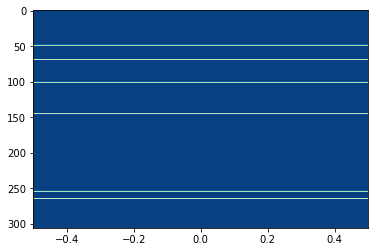

In [74]:
#white lines are wrong predictions, green are correct
all_image(pred_dfG,"GnBu")

In [24]:
print_all_pred(pred_dfG)

Number of correct predictions: 300 out of 306
Percentage of correct predictions: 0.9803921568627451


In [25]:
pred_dfG[pred_dfG["correct predictions"] == False]

,Player,Ground Truth All-NBA Score,pred score,predictions,season,correct predictions
258,James Harden,0,0.887410,1,2021,False
381,Zach LaVine,0,0.905291,1,2021,False
510,Chris Paul,1,0.680420,0,2021,False
702,Trae Young,0,0.905063,1,2021,False
1220,Donovan Mitchell,0,0.830309,1,2122,False
1287,Chris Paul,1,0.006740,0,2122,False


# 

## Predictions for Players who Actually Made All-NBA Team

In [26]:
pred_dfG[pred_dfG["Ground Truth All-NBA Score"] == 1]

,Player,Ground Truth All-NBA Score,pred score,predictions,season,correct predictions
45,Bradley Beal,1,0.888079,1,2021,True
151,Stephen Curry,1,0.986361,1,2021,True
171,Luka Dončić,1,0.978559,1,2021,True
317,Kyrie Irving,1,0.931023,1,2021,True
329,LeBron James,1,0.816966,1,2021,True
396,Damian Lillard,1,0.972035,1,2021,True
510,Chris Paul,1,0.680420,0,2021,False
775,Devin Booker,1,0.889030,1,2122,True
864,Stephen Curry,1,0.921242,1,2122,True
883,Luka Dončić,1,0.986029,1,2122,True


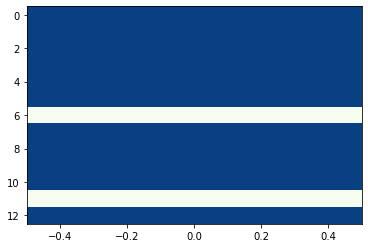

In [73]:
#white lines are wrong predictions, green are correct for players that actually make the all_nba team
#which all-nba players were classified correctly
all_nba_image(pred_dfG,"GnBu")

In [28]:
print_all_nba_pred(pred_dfG)

Number of correct predictions: 11 out of 13
Percentage of correct predictions: 0.8461538461538461


# 

# Wrong Predictions

In [29]:
missed_pred(pred_dfG)

,index,Player,Ground Truth All-NBA Score,pred score,predictions,season,correct predictions
0,510,Chris Paul,1,0.68042,0,2021,False
1,1287,Chris Paul,1,0.00674,0,2122,False


In [30]:
false_pos(pred_dfG)

,index,Player,Ground Truth All-NBA Score,pred score,predictions,season,correct predictions
0,258,James Harden,0,0.887410,1,2021,False
1,381,Zach LaVine,0,0.905291,1,2021,False
2,702,Trae Young,0,0.905063,1,2021,False
3,1220,Donovan Mitchell,0,0.830309,1,2122,False


In [31]:
meansG = means_df(testdf2,pred_dfG)
meansG = meansG.drop(labels="season", axis = 0)
meansG

/Users/samanthawong/Desktop/NBA stats/projectfun.py:159: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/Users/samanthawong/Desktop/NBA stats/projectfun.py:162: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,False Negative Means,False Positive Means
G,58.00000,67.5000
PER,22.65000,21.1000
TS%,0.60325,0.5900
TRB%,8.22500,7.5500
AST%,35.25000,42.7000
USG%,31.32500,21.1500
WS/48,0.16525,0.2055
BPM,4.80000,5.0000
VORP,3.35000,3.8000
PPG,25.80000,15.5500


In [32]:
overlap_bar(meansG)

# 

# 

# 

# Run Front Court Model

In [33]:
modelF, y_predF,val_lossF,val_accF = model(X_trainF,y_trainF,X_testF,y_testF)


Epoch 1/200
49/49 [==============================] - 1s 5ms/step - loss: 0.7143 - accuracy: 0.8380 - val_loss: 0.2614 - val_accuracy: 0.8832
Epoch 2/200
49/49 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.9133 - val_loss: 0.1683 - val_accuracy: 0.9036
Epoch 3/200
49/49 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.9324 - val_loss: 0.1412 - val_accuracy: 0.9137
Epoch 4/200
49/49 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9401 - val_loss: 0.0960 - val_accuracy: 0.9543
Epoch 5/200
49/49 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9439 - val_loss: 0.0932 - val_accuracy: 0.9492
Epoch 6/200
49/49 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.9541 - val_loss: 0.0799 - val_accuracy: 0.9594
Epoch 7/200
49/49 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.9681 - val_loss: 0.0503 - val_accuracy: 0.9746
Epoch 8/200
4

In [34]:
print("Final Validation Loss after Last Epoch: ", val_lossF[-1])
print("Final Validation Accuracy after Last Epoch: ", val_accF[-1])


Final Validation Loss after Last Epoch:  0.05467114597558975
Final Validation Accuracy after Last Epoch:  0.9746192693710327


In [35]:
Fval_df = pd.DataFrame()
Fval_df["Validation Data Loss"] = val_lossF 
Fval_df["Validation Data Accuracy"] = val_accF 
Fval_df["Epoch"] = range(len(val_lossF))

fig = px.line(Fval_df,x="Epoch", y="Validation Data Loss", title='Validation Loss after each Epoch For Front Court Model')
fig.update_traces(line_color='#26580F')
fig.show()

In [36]:
fig = px.line(Fval_df,x="Epoch", y="Validation Data Accuracy", title='Validation Accuracy after each Epoch For Front Court Model')
fig.update_traces(line_color='#378805')
fig.show()


In [37]:
pred_dfF = top_score_df(testdf_fronts,y_predF,12)
pred_dfF["correct predictions"] = pred_dfF["Ground Truth All-NBA Score"] == pred_dfF["predictions"]

/Users/samanthawong/Desktop/NBA stats/projectfun.py:86: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Predictions for Entire Dataset

In [38]:
pred_dfF[pred_dfF["correct predictions"] == False]

,Player,Ground Truth All-NBA Score,pred score,predictions,season,correct predictions
223,Paul George,1,0.875429,0,2021,False
577,Domantas Sabonis,0,0.936729,1,2021,False
610,Jayson Tatum,0,0.936456,1,2021,False
688,Zion Williamson,0,0.973063,1,2021,False
811,Jimmy Butler,0,0.982152,1,2122,False
872,DeMar DeRozan,1,0.912101,0,2122,False


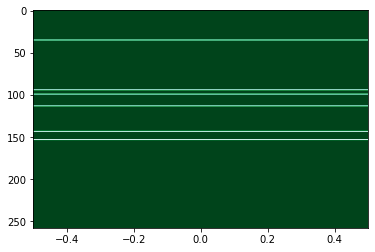

In [75]:
all_image(pred_dfF,"BuGn")

In [40]:
print_all_pred(pred_dfF)

Number of correct predictions: 252 out of 258
Percentage of correct predictions: 0.9767441860465116


# 

## Predictions for Players who Actually Made All-NBA Team

In [41]:
pred_dfF[pred_dfF["Ground Truth All-NBA Score"] == 1]

,Player,Ground Truth All-NBA Score,pred score,predictions,season,correct predictions
17,Giannis Antetokounmpo,1,0.998030,1,2021,True
106,Jimmy Butler,1,0.991515,1,2021,True
223,Paul George,1,0.875429,0,2021,False
390,Kawhi Leonard,1,0.975642,1,2021,True
544,Julius Randle,1,0.964667,1,2021,True
720,Giannis Antetokounmpo,1,0.999708,1,2122,True
872,DeMar DeRozan,1,0.912101,0,2122,False
903,Kevin Durant,1,0.993228,1,2122,True
1372,Pascal Siakam,1,0.959543,1,2122,True
1413,Jayson Tatum,1,0.981504,1,2122,True


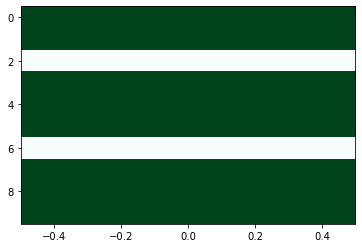

In [76]:
all_nba_image(pred_dfF,"BuGn")

In [43]:
print_all_nba_pred(pred_dfF)

Number of correct predictions: 8 out of 10
Percentage of correct predictions: 0.8


# 

## Wrong Predictions

In [44]:
missed_pred(pred_dfF)

,index,Player,Ground Truth All-NBA Score,pred score,predictions,season,correct predictions
0,223,Paul George,1,0.875429,0,2021,False
1,872,DeMar DeRozan,1,0.912101,0,2122,False


In [45]:
false_pos(pred_dfF)

,index,Player,Ground Truth All-NBA Score,pred score,predictions,season,correct predictions
0,577,Domantas Sabonis,0,0.936729,1,2021,False
1,610,Jayson Tatum,0,0.936456,1,2021,False
2,688,Zion Williamson,0,0.973063,1,2021,False
3,811,Jimmy Butler,0,0.982152,1,2122,False


In [46]:
meansF = means_df(testdf2,pred_dfF)
meansF = meansF.drop(labels="season", axis = 0)
meansF

/Users/samanthawong/Desktop/NBA stats/projectfun.py:159: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/Users/samanthawong/Desktop/NBA stats/projectfun.py:162: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,False Negative Means,False Positive Means
G,61.00000,65.0000
PER,23.15000,21.8000
TS%,0.60450,0.5940
TRB%,12.80000,9.5500
AST%,23.47500,23.9500
USG%,27.80000,30.9000
WS/48,0.17975,0.1465
BPM,4.95000,3.3500
VORP,3.67500,3.0000
PPG,23.77500,25.6000


In [47]:
overlap_bar(meansF)

# 

# 

In [48]:
modelC, y_predC,val_lossC,val_accC = model(X_trainC,y_trainC,X_testC,y_testC)


Epoch 1/200
25/25 [==============================] - 1s 9ms/step - loss: 0.9136 - accuracy: 0.6221 - val_loss: 0.5741 - val_accuracy: 0.8571
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7489 - accuracy: 0.8380 - val_loss: 0.4350 - val_accuracy: 0.8980
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.8766 - val_loss: 0.3314 - val_accuracy: 0.9184
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.8920 - val_loss: 0.2204 - val_accuracy: 0.9388
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.9049 - val_loss: 0.2019 - val_accuracy: 0.9286
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3797 - accuracy: 0.9152 - val_loss: 0.1585 - val_accuracy: 0.9286
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3281 - accuracy: 0.9177 - val_loss: 0.1412 - val_accuracy: 0.9388
Epoch 8/200
2

In [49]:
print("Final Validation Loss after Last Epoch: ", val_lossC[-1])
print("Final Validation Accuracy after Last Epoch: ", val_accC[-1])


Final Validation Loss after Last Epoch:  0.13310641050338745
Final Validation Accuracy after Last Epoch:  0.9489796161651611


In [50]:
Cval_df = pd.DataFrame()
Cval_df["Validation Data Loss"] = val_lossC
Cval_df["Validation Data Accuracy"] = val_accC 
Cval_df["Epoch"] = range(len(val_lossC))

fig = px.line(Cval_df,x="Epoch", y="Validation Data Loss", title='Validation Loss after each Epoch For Center Model')
fig.update_traces(line_color='#541e1b')
fig.show()

In [51]:
fig = px.line(Cval_df,x="Epoch", y="Validation Data Accuracy", title='Validation Accuracy after each Epoch For Center Model')
fig.update_traces(line_color='#d21404')
fig.show()


In [52]:
pred_dfC = top_score_df(testdf_cents,y_predC,6)
pred_dfC["correct predictions"] = pred_dfC["Ground Truth All-NBA Score"] == pred_dfC["predictions"]

/Users/samanthawong/Desktop/NBA stats/projectfun.py:86: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Predictions for Entire Dataset

In [53]:
pred_dfC[pred_dfC["correct predictions"] == False]

,Player,Ground Truth All-NBA Score,pred score,predictions,season,correct predictions
1073,LeBron James,1,0.749911,0,2122,False


In [54]:
testdf_cents[testdf_cents["Player"] == "LeBron James"]

,Player,G,PER,TS%,TRB%,AST%,USG%,WS/48,BPM,VORP,PPG,season,All-Nba
1073,LeBron James,56,26.2,0.619,11.8,30.6,32.3,0.172,7.7,5.1,30.3,2122,1


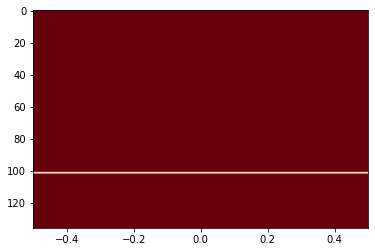

In [55]:
all_image(pred_dfC,"Reds")

In [56]:
print_all_pred(pred_dfC)

Number of correct predictions: 135 out of 136
Percentage of correct predictions: 0.9926470588235294


# 

## Predictions for Players who Actually Made All-NBA Team

In [57]:
pred_dfC[pred_dfC["Ground Truth All-NBA Score"] == 1]

,Player,Ground Truth All-NBA Score,pred score,predictions,season,correct predictions
189,Joel Embiid,1,0.966673,1,2021,True
229,Rudy Gobert,1,0.911896,1,2021,True
344,Nikola Jokić,1,0.989220,1,2021,True
911,Joel Embiid,1,0.986231,1,2122,True
1073,LeBron James,1,0.749911,0,2122,False
1096,Nikola Jokić,1,0.988159,1,2122,True
1441,Karl-Anthony Towns,1,0.886384,1,2122,True


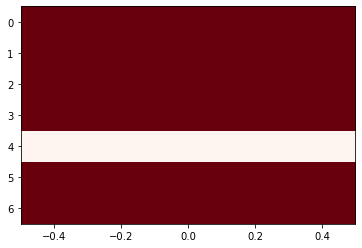

In [58]:
all_nba_image(pred_dfC,"Reds")

In [59]:
print_all_nba_pred(pred_dfC)

Number of correct predictions: 6 out of 7
Percentage of correct predictions: 0.8571428571428571


# 

## Wrong Predictions

In [60]:
missed_pred(pred_dfC)

,index,Player,Ground Truth All-NBA Score,pred score,predictions,season,correct predictions
0,1073,LeBron James,1,0.749911,0,2122,False


In [61]:
false_pos(pred_dfC)

,index,Player,Ground Truth All-NBA Score,pred score,predictions,season,correct predictions


In [64]:
meansC = means_df(testdf2,pred_dfC)
meansC = meansC.drop(labels="season", axis = 0)
meansC

/Users/samanthawong/Desktop/NBA stats/projectfun.py:162: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,False Negative Means,False Positive Means
Player,NaN,NaN
Pos,NaN,NaN
G,NaN,56.000
PER,NaN,26.200
TS%,NaN,0.619
TRB%,NaN,11.800
AST%,NaN,30.600
USG%,NaN,32.300
WS/48,NaN,0.172
BPM,NaN,7.700


In [63]:
overlap_bar(meansC)